In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Args

In [3]:
EXP = "exp5/"

In [4]:
PRJ = "venn_TCR-MHC-CD8/"

In [20]:
BARCODE_SYSTEM_REGEX = "^(?!.*A\d+B\d+).*$" #"^A\d+B\d+"

In [18]:
ANTIBODY_REGEX = "HASH" #"A4000"

## Plotting directory

In [5]:
TAB_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/"

In [6]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" + EXP + PRJ
TAB_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/tables/" + EXP #+ PRJ

In [6]:
FIG_SUND = "/Volumes/sund/Public/T-cells-and-cancer/herpov/plots/" + EXP + PRJ
TAB_SUND = "/Volumes/sund/Public/T-cells-and-cancer/herpov/tables/" + EXP + PRJ

## Input data

In [73]:
tcr_contig_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp5_TCR/augmented/tcr.filtered.augmented.csv"
map_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp5_MHC_ILLUMINA/kma/kma-1t1/output/mapping.clean.gz"
specificity_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp5_MHC_ILLUMINA/barcode_library/barcode_specificity_annotations.tab"
response_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/barcode_library/detected_responses_annotation.xlsx"

## Output data

In [8]:
GEM_LISTS = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/gem_lists/"

In [7]:
EXP

'exp5/'

# Import input

In [94]:
tcr_df = pd.read_csv(tcr_contig_annotations)

In [9]:
map_df = pd.read_csv(map_annotations, sep="\t") #, usecols=['query_id', 'template_id', 'gem', 'bit_score', 'alignment_length', 'tso', 'b_primer', 'anneal', 'a_primer', 'match'], sep=" ", names=["read_id", "gem", "tso", "b_primer", "anneal", "cd8_primer", "mhc_primer"]

In [10]:
specificity_df = pd.read_csv(specificity_annotations, sep='\t')

In [11]:
response_df = pd.read_excel(response_annotations, index_col=None, usecols=['barcode_cd8', 'peptide'])

## Streamline variable names

In [82]:
#tcr_df.rename(columns={"barcode" : "gem"}, inplace=True)
#tcr_df.rename(columns={'raw_clonotype_id': 'clonotype'}, inplace=True)

In [15]:
specificity_df.rename(columns={'Barcode': 'barcode',
                               'Sequence': 'peptide',
                               'number': 'epitope'},
                     inplace=True)

# Stats

In [17]:
np.savetxt(GEM_LISTS + "blast_df.lst", blast_df.gem.unique(), fmt='%s')
blast_df.gem.unique().shape

(41462,)

In [18]:
np.savetxt(GEM_LISTS + "tcr_df.lst", tcr_df.gem.unique(), fmt='%s')
tcr_df.gem.unique().shape

(17517,)

In [21]:
map_df.gem.isin(tcr_df.gem.unique()).shape

(4780517,)

In [22]:
map_df.shape

(4780517, 12)

## Process mapping table

In [19]:
#blast_df.replace({"gem": r"^BX:Z:"}, {"gem": ""}, regex=True, inplace=True)
#doublets = blast_df.duplicated(['query_id', 'gem', 'bit_score'], keep=False) #, 't_alignment_start', 't_alignment_end', 'q_alignment_start', 'q_alignment_end', 'match'
#blast_df['credible_alignment'] = np.where(doublets, False, True)
#blast_df.sort_values(by=['gem', 'query_id', 'bit_score', 'alignment_length'], ascending=False, inplace=True) #
#blast_df.drop_duplicates(['query_id'], inplace=True)
#blast_df['barcode'], blast_df['sample'] = blast_df.template_id.str.split("_", n=1).str

In [22]:
map_df = map_df[map_df.barcode.str.contains(BARCODE_SYSTEM_REGEX)]

At this point I have a table with multiple lines per GEM: each line corresponds to the best annotated read. The annotation of reads may agree on the same barcode or may disagree. Later I will count the number of reads for each barcode and only present the barcode with most reads.

# OBS! OBS! OBS!
subset by credible alignments before counting reads?!? Count equal barcodes not template ids?

## Annotate barcode read counts

In [23]:
map_df

,uncertainty,score,t_alignment_start,t_alignment_end,template_id,read_header,query_id,gem,credible_alignment,alignment_length,barcode,sample
19833,1,24,0,24,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1113:16838:6658 B...,M02023:537:000000000-CLG4W:1:1113:16838:6658,AACGTTGCAATGGAGC-1,True,24,ADT_5000,<unknown description>
19834,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:2109:20177:23867 ...,M02023:537:000000000-CLG4W:1:2109:20177:23867,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19835,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:2109:17562:16721 ...,M02023:537:000000000-CLG4W:1:2109:17562:16721,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19836,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:2107:7284:23565 B...,M02023:537:000000000-CLG4W:1:2107:7284:23565,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19837,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:2107:5099:11646 B...,M02023:537:000000000-CLG4W:1:2107:5099:11646,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19838,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1109:9317:7254 BX...,M02023:537:000000000-CLG4W:1:1109:9317:7254,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19839,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1105:22500:9786 B...,M02023:537:000000000-CLG4W:1:1105:22500:9786,AACCATGGTCATACTG-1,True,25,ADT_5000,<unknown description>
19840,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1107:11249:9917 B...,M02023:537:000000000-CLG4W:1:1107:11249:9917,AACACGTTCGCCTGAG-1,True,25,ADT_5000,<unknown description>
19841,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1108:26563:8021 B...,M02023:537:000000000-CLG4W:1:1108:26563:8021,AACACGTCAAGCCTAT-1,True,25,ADT_5000,<unknown description>
19842,1,25,0,25,ADT_5000_sample,M02023:537:000000000-CLG4W:1:1114:9418:23666 B...,M02023:537:000000000-CLG4W:1:1114:9418:23666,AAATGCCCATCTGGTA-1,True,25,ADT_5000,<unknown description>


In [24]:
cd8_df = map_df[(map_df.credible_alignment == True) & (map_df.template_id.str.contains(ANTIBODY_REGEX, na = False))] 
mhc_df = map_df[(map_df.credible_alignment == True) & (~map_df.template_id.str.contains(ANTIBODY_REGEX, na = False))]

In [25]:
cd8_unique_df = cd8_df.groupby(['gem'])['template_id'].apply(pd.Series.mode).to_frame().reset_index()
mhc_unique_df = mhc_df.groupby(['gem'])['template_id'].apply(pd.Series.mode).to_frame().reset_index()
#
#np.savetxt(GEM_LISTS + "cd8_unique_df.lst", cd8_unique_df.gem.unique(), fmt='%s')
#np.savetxt(GEM_LISTS + "mhc_unique_df.lst", mhc_unique_df.gem.unique(), fmt='%s')

In [26]:
cd8_read_counts_df = cd8_df.groupby(['gem', 'template_id'])['query_id'].count().to_frame().reset_index()
mhc_read_counts_df = mhc_df.groupby(['gem', 'template_id'])['query_id'].count().to_frame().reset_index()
cd8_read_counts_df.rename(columns={'query_id': 'read_counts'}, inplace=True)
mhc_read_counts_df.rename(columns={'query_id': 'read_counts'}, inplace=True)

## Annotate specificities

In [27]:
mhc_read_counts_df['barcode'], mhc_read_counts_df['sample'] = mhc_read_counts_df.template_id.str.rsplit("_", n=1).str

In [28]:
mhc_read_counts_df = pd.merge(mhc_read_counts_df, specificity_df[['barcode','epitope']], how='left', on='barcode')

## Collapse multiple annotations per GEM into one

In [29]:
mhc_read_counts_df.sort_values(by=['gem', 'read_counts'], inplace=True)
cd8_read_counts_df.sort_values(by=['gem', 'read_counts'], inplace=True)
mhc_read_count_diffs_df = mhc_read_counts_df.groupby(['gem']).read_counts.apply(np.array).to_frame().reset_index()
cd8_read_count_diffs_df = cd8_read_counts_df.groupby(['gem']).read_counts.apply(np.array).to_frame().reset_index()
mhc_read_count_diffs_df.rename(columns={'read_counts': 'read_counts_lst'}, inplace=True)
cd8_read_count_diffs_df.rename(columns={'read_counts': 'read_counts_lst'}, inplace=True)
mhc_read_count_diffs_df['read_count_diff'] = mhc_read_count_diffs_df.read_counts_lst.apply(lambda x: round((x[-1]-x[-2])/x[-1], 3) if len(x)>1 else 1.000)
cd8_read_count_diffs_df['read_count_diff'] = cd8_read_count_diffs_df.read_counts_lst.apply(lambda x: round((x[-1]-x[-2])/x[-1], 3) if len(x)>1 else 1.000)
mhc_read_count_diffs_df['single_barcode'] = mhc_read_count_diffs_df.read_counts_lst.apply(lambda x: True if len(x)==1 else False)
cd8_read_count_diffs_df['single_barcode'] = cd8_read_count_diffs_df.read_counts_lst.apply(lambda x: True if len(x)==1 else False)
mhc_read_count_diffs_df['template_lst'] = mhc_read_counts_df.groupby(['gem']).template_id.apply(np.array).to_frame().reset_index().template_id
cd8_read_count_diffs_df['template_lst'] = cd8_read_counts_df.groupby(['gem']).template_id.apply(np.array).to_frame().reset_index().template_id

In [30]:
mhc_read_count_diffs_df['epitope_lst'] = mhc_read_counts_df.groupby(['gem']).epitope.apply(np.array).to_frame().reset_index().epitope

In [31]:
cd8_mode_df = pd.merge(cd8_unique_df[['gem', 'template_id']], cd8_df, on=['gem','template_id'], how='left').merge(cd8_read_counts_df[['gem', 'template_id', 'read_counts']],
                                                                                                                  how='left', on=['gem','template_id']).merge(cd8_read_count_diffs_df, how='left', on='gem')
mhc_mode_df = pd.merge(mhc_unique_df[['gem', 'template_id']], mhc_df, on=['gem','template_id'], how='left').merge(mhc_read_counts_df[['gem', 'template_id', 'read_counts', 'epitope']],
                                                                                                                  how='left', on=['gem','template_id']).merge(mhc_read_count_diffs_df, how='left', on='gem')

In [32]:
cd8_mode_df.sort_values(by=['gem', 'score', 'alignment_length'], inplace=True) #'credible_alignment', 'match', 
mhc_mode_df.sort_values(by=['gem', 'score', 'alignment_length'], inplace=True) #'credible_alignment', 'match', 
cd8_mode_df.drop_duplicates(subset=['gem'], keep='last', inplace=True)
mhc_mode_df.drop_duplicates(subset=['gem'], keep='last', inplace=True)

In [33]:
print("MHC entries: %i" %mhc_mode_df.shape[0])
print("Unique GEMs: %i" %mhc_mode_df.gem.unique().shape[0])
#np.savetxt(GEM_LISTS + "mhc_mode_df.lst", mhc_mode_df.gem.unique(), fmt='%s')

print("CD8 entries: %i" %cd8_mode_df.shape[0])
print("Unique GEMs: %i" %cd8_mode_df.gem.unique().shape[0])
#np.savetxt(GEM_LISTS + "cd8_mode_df.lst", cd8_mode_df.gem.unique(), fmt='%s')

MHC entries: 52475
Unique GEMs: 52475
CD8 entries: 81710
Unique GEMs: 81710


#### OBS!
At this point we have a table with one line per GEM. The barcode annotation is chosen from the majority vote of read counts. However, if two barcodes are annotated with equal number of reads, they are distinguished based on credible_alignment, match, bit_score, and alignment_length...
OBS! We are not using UMI - so we don't know if the read count is inflated. And we don't take into account the alignment score or the alignment length! What if the majority of reads map poorly?

## Produce barcode table

In [35]:
barcode_df = pd.merge(mhc_mode_df[['gem', 'template_id', 'template_lst', 'barcode', 'sample', 'read_counts', 'read_counts_lst', 'read_count_diff', 'single_barcode', 'credible_alignment', 'epitope_lst']],
                      cd8_mode_df[['gem', 'template_id', 'template_lst', 'barcode', 'sample', 'read_counts', 'read_counts_lst', 'read_count_diff', 'single_barcode', 'credible_alignment']],
                      how='outer', on='gem', suffixes=('_mhc', '_cd8')) #'match',

In [99]:
assert barcode_df.shape[0] == barcode_df.gem.unique().shape[0], "Barcode dataframe was not reduced satisfyingly"

In [36]:
print("Entries: %i" %barcode_df.shape[0])
print("Unique GEMs: %i" %barcode_df.gem.unique().shape[0])
#np.savetxt(GEM_LISTS + "barcode_df.lst", barcode_df.gem.unique(), fmt='%s')

Entries: 82440
Unique GEMs: 82440


### Specificity matrix

In [37]:
specificity_matrix = mhc_mode_df.pivot(index='gem', columns='epitope', values='read_counts')

## Response df

In [39]:
response_df.sort_values(by=['peptide','barcode_cd8'], inplace=True)
response_df.drop_duplicates(inplace=True)
response_df['detected_response'] = True

## Merge barcode and specificity

In [40]:
specificity_matrix.shape

(52475, 3)

In [41]:
barcode_specificity_df = pd.merge(barcode_df[['gem',
                                              'credible_alignment_mhc',
                                              'credible_alignment_cd8',
                                              'template_id_mhc', 'barcode_mhc', 'sample_mhc', 'read_counts_mhc', 'read_count_diff_mhc', 'single_barcode_mhc', 'read_counts_lst_mhc', 'template_lst_mhc', 'epitope_lst',
                                              'template_id_cd8', 'barcode_cd8', 'sample_cd8', 'read_counts_cd8', 'read_count_diff_cd8', 'single_barcode_cd8', 'read_counts_lst_cd8', 'template_lst_cd8']],
                                  specificity_df,
                                  how='left',
                                  left_on='barcode_mhc',
                                  right_on='barcode').merge(response_df,
                                                            how='left',
                                                            on=['barcode_cd8', 'peptide']).merge(specificity_matrix, how='left', on='gem') # 'match_mhc','match_cd8', 

In [42]:
print("Entries: %i" %barcode_specificity_df.shape[0])
print("Unique GEMs: %i" %barcode_specificity_df.gem.unique().shape[0])
#np.savetxt(GEM_LISTS + "barcode_specificity_df.lst", barcode_specificity_df.gem.unique(), fmt='%s')

Entries: 82440
Unique GEMs: 82440


At this point the dataframe consists of unique GEMs per row - except for 9 GEMs that are represented twice(?!). The GEMs are annotated with barcodes of MHC and CD8, with peptide specificities based on the MHC barcode and detected responses based on CD8 barcodes.

Why I have 9 extra I don't know yet...

barcode_specificity_df.groupby('gem').size().sort_values()

## Merge clonotypes and barcodes

In [50]:
new_column_order = ['gem',
 'credible_alignment_mhc',
 'credible_alignment_cd8',
 'template_id_mhc',
 'read_counts_mhc',
 'read_count_diff_mhc',
 'single_barcode_mhc',
 'read_counts_lst_mhc',
 'template_lst_mhc',
 'template_id_cd8',
 'read_counts_cd8',
 'read_count_diff_cd8',
 'single_barcode_cd8',
 'read_counts_lst_cd8',
 'template_lst_cd8',
 'detected_response',
 'peptide',
 'HLA',
 'epitope',
 'epitope_lst'] + specificity_matrix.columns.to_list() #'match_mhc','match_cd8',

In [51]:
clonotype_barcode_specificity_df = pd.merge(tcr_chain_match_df[['gem', 'clonotype',
                                                                'cdr3_TRA', 'cdr3_nt_TRA',
                                                                'cdr3_TRB', 'cdr3_nt_TRB',
                                                                'umis_TRA', 'umis_diff_TRA', 'single_TRA', 'umis_lst_TRA', 'cdr3_lst_TRA',
                                                                'umis_TRB', 'umis_diff_TRB', 'single_TRB', 'umis_lst_TRB', 'cdr3_lst_TRB']],
                                            barcode_specificity_df[new_column_order],
                                            how='right', on='gem')

column_names_to_be_removed = clonotype_barcode_specificity_df.columns.to_list()
column_names_to_be_removed.remove('umis_lst_TRA')
column_names_to_be_removed.remove('umis_lst_TRB')
column_names_to_be_removed.remove('read_counts_lst_mhc')
column_names_to_be_removed.remove('read_counts_lst_cd8')
column_names_to_be_removed.remove('template_lst_mhc')
column_names_to_be_removed.remove('template_lst_cd8')
column_names_to_be_removed.remove('cdr3_lst_TRA')
column_names_to_be_removed.remove('cdr3_lst_TRB')
column_names_to_be_removed.remove('cdr3_TRA')
column_names_to_be_removed.remove('cdr3_TRB')
column_names_to_be_removed.remove('cdr3_nt_TRA')
column_names_to_be_removed.remove('cdr3_nt_TRB')
column_names_to_be_removed.remove('epitope_lst')

clonotype_barcode_specificity_df.drop_duplicates(subset=column_names_to_be_removed, inplace=True)

In [52]:
print(clonotype_barcode_specificity_df.shape)
print(clonotype_barcode_specificity_df.gem.unique().shape)
#np.savetxt(GEM_LISTS + "clonotype_barcode_specificity_df.lst", clonotype_barcode_specificity_df.gem.unique(), fmt='%s')

(82440, 38)
(82440,)


In [53]:
#tmp_df = clonotype_barcode_specificity_df[(clonotype_barcode_specificity_df.credible_alignment_mhc == True)].copy()
#print(tmp_df.shape)
#print(tmp_df.gem.unique().shape)
#tmp_df['num_clonotype'] = pd.to_numeric(tmp_df['clonotype'].fillna('None').str.split('clonotype').str[1], errors='coerce').replace(np.nan, 0, regex=True).astype(int)
#tmp_df.drop(tmp_df[tmp_df.num_clonotype == 0].index, inplace=True)
#tmp_df.drop(tmp_df[tmp_df.epitope == '0'].index, inplace=True)
#tmp_df.drop(tmp_df[tmp_df.epitope == 'Unnamed: 39'].index, inplace=True)
#print(tmp_df.shape)
#print(tmp_df.gem.unique().shape)
#tmp_gems = tmp_df.gem.unique()

At this point the table contains clonotype

## Merge TCR and barcodes

In [54]:
tcr_barcode_specificity_df = pd.merge(tcr_chain_match_df,
                                      barcode_df,
                                      how='right', on='gem')

column_names_to_be_removed = tcr_barcode_specificity_df.columns.to_list()
column_names_to_be_removed.remove('umis_lst_TRA')
column_names_to_be_removed.remove('umis_lst_TRB')
column_names_to_be_removed.remove('read_counts_lst_mhc')
column_names_to_be_removed.remove('read_counts_lst_cd8')
column_names_to_be_removed.remove('template_lst_mhc')
column_names_to_be_removed.remove('template_lst_cd8')
column_names_to_be_removed.remove('cdr3_lst_TRA')
column_names_to_be_removed.remove('cdr3_lst_TRB')
column_names_to_be_removed.remove('cdr3_TRA')
column_names_to_be_removed.remove('cdr3_TRB')
column_names_to_be_removed.remove('cdr3_nt_TRA')
column_names_to_be_removed.remove('cdr3_nt_TRB')
column_names_to_be_removed.remove('epitope_lst')


tcr_barcode_specificity_df.drop_duplicates(subset=column_names_to_be_removed, inplace=True)

In [55]:
print(tcr_barcode_specificity_df.shape)
print(tcr_barcode_specificity_df.gem.unique().shape)
#np.savetxt(GEM_LISTS + "tcr_barcode_specificity_df.lst", tcr_barcode_specificity_df.gem.unique(), fmt='%s')

(82440, 47)
(82440,)


## Write to excel

In [134]:
with pd.ExcelWriter(TAB_DIR + "tcr_barcode.annotated.xlsx") as writer:
    clonotype_barcode_specificity_df.to_excel(writer,
                                              sheet_name='all_gems_template_single_line',
                                              index=False)
    clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.credible_alignment_cd8 == True].to_excel(writer,
                                                                                                               sheet_name='cd8_cred_gems',
                                                                                                               index=False)
    clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.credible_alignment_mhc == True].to_excel(writer,
                                                                                                               sheet_name='mhc_cred_gems',
                                                                                                               index=False)
    clonotype_barcode_specificity_df[(clonotype_barcode_specificity_df.credible_alignment_mhc == True) & (clonotype_barcode_specificity_df.credible_alignment_cd8 == True)].to_excel(writer,sheet_name='all_cred_gems',index=False)
    tcr_barcode_specificity_df.to_excel(writer,
                                        sheet_name='tcr_annotations.gems_multi_line',
                                        index=False)

In [135]:
clonotype_barcode_specificity_df.to_csv(TAB_DIR + "tcr_barcode.annotated.csv", index=False)

# Plots

## Venn diagrams

In [64]:
# Assumes that inputs are sets
a, b, c = set(tcr_chain_match_df['gem'].to_list()), set(barcode_df[(barcode_df.match_mhc > 1) & (barcode_df.a_primer_mhc == 'PRIMER_MHC')].gem.to_list()), set(barcode_df[(barcode_df.match_cd8 > 1) & (barcode_df.a_primer_cd8 == 'PRIMER_CD8')].gem.to_list())

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc

from matplotlib_venn import venn3

title = "GEM intersections between TCR-MHC-CD8 (cutadapt)"
# Make the diagram
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('TCR', 'MHC', 'CD8'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".pdf", bbox_inches='tight')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'a_primer_mhc'

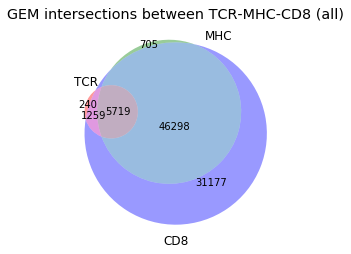

In [57]:
## OBS! Make sure that the inputs here have not been filtered by credible == True
version = 2
project = 'all'

# Assumes that inputs are sets
a, b, c = set(tcr_chain_match_df['gem'].to_list()), set(map_df[~map_df.template_id.str.contains(ANTIBODY_REGEX, na = False)].gem.to_list()), set(map_df[map_df.template_id.str.contains(ANTIBODY_REGEX, na = False)].gem.to_list())

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc

from matplotlib_venn import venn3

title = "GEM intersections between TCR-MHC-CD8 (%s)"%project # (BLAST)
# Make the diagram
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('TCR', 'MHC', 'CD8'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".pdf", bbox_inches='tight')
#plt.savefig(FIG_SUND + "v%i.%s.pdf" %(version, project), bbox_inches='tight')
plt.show()



In [62]:
tcr_chain_match_df[(tcr_chain_match_df.single_TRA == True) & (tcr_chain_match_df.single_TRB == True)].gem.size

1119

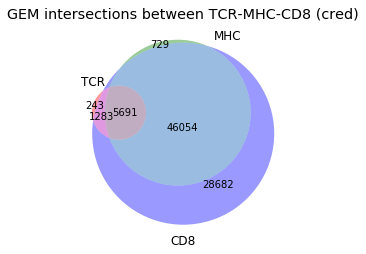

In [63]:
version = 2
project = 'cred'

# Assumes that inputs are sets
a, b, c = set(tcr_chain_match_df.gem.to_list()), set(mhc_df.gem.to_list()), set(cd8_df.gem.to_list()) #[mhc_df.credible_alignment == True],[cd8_df.credible_alignment == True]

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_c = ab - abc
ac_b = ac - abc
bc_a = bc - abc
a_bc = a - ab_c - ac_b - abc
b_ac = b - ab_c - bc_a - abc
c_ab = c - ac_b - bc_a - abc

from matplotlib_venn import venn3

title = "GEM intersections between TCR-MHC-CD8 (%s)"%project # BLAST
# Make the diagram
venn3(subsets = (len(a_bc), len(b_ac), len(ab_c), len(c_ab), len(ac_b), len(bc_a), len(abc)), set_labels = ('TCR', 'MHC', 'CD8'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".pdf", bbox_inches='tight')
#plt.savefig(FIG_SUND + "v%i.%s.pdf" %(version, project), bbox_inches='tight')
plt.show()

#np.savetxt(GEM_LISTS + "venn_cred_ab.lst", list(ab), fmt='%s')
#np.savetxt(GEM_LISTS + "venn_cred_abc.lst", list(abc), fmt='%s')
#np.savetxt(GEM_LISTS + "venn_cred_ab_c.lst", list(ab_c), fmt='%s')



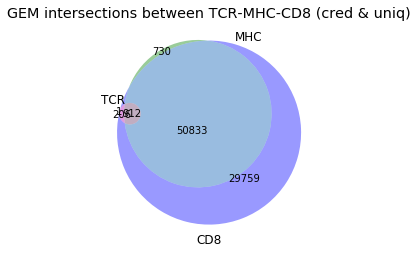

In [64]:
version = 2
project = 'cred & uniq'

# Assumes that inputs are sets
a, b, c = set(tcr_chain_match_df[(tcr_chain_match_df.single_TRA == True) & (tcr_chain_match_df.single_TRB == True)].gem.to_list()), set(mhc_df.gem.to_list()), set(cd8_df.gem.to_list()) #[mhc_df.credible_alignment == True],[cd8_df.credible_alignment == True]

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_c = ab - abc
ac_b = ac - abc
bc_a = bc - abc
a_bc = a - ab_c - ac_b - abc
b_ac = b - ab_c - bc_a - abc
c_ab = c - ac_b - bc_a - abc

from matplotlib_venn import venn3

title = "GEM intersections between TCR-MHC-CD8 (%s)"%project # BLAST
# Make the diagram
venn3(subsets = (len(a_bc), len(b_ac), len(ab_c), len(c_ab), len(ac_b), len(bc_a), len(abc)), set_labels = ('TCR', 'MHC', 'CD8'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".pdf", bbox_inches='tight')
#plt.savefig(FIG_SUND + "v%i.%s.pdf" %(version, project), bbox_inches='tight')
plt.show()

#np.savetxt(GEM_LISTS + "venn_cred_ab.lst", list(ab), fmt='%s')
#np.savetxt(GEM_LISTS + "venn_cred_abc.lst", list(abc), fmt='%s')
#np.savetxt(GEM_LISTS + "venn_cred_ab_c.lst", list(ab_c), fmt='%s')




In [96]:
mhc_df.gem

19833     BX:Z:AACGTTGCAATGGAGC-1
19834     BX:Z:AACCATGGTCATACTG-1
19835     BX:Z:AACCATGGTCATACTG-1
19836     BX:Z:AACCATGGTCATACTG-1
19837     BX:Z:AACCATGGTCATACTG-1
19838     BX:Z:AACCATGGTCATACTG-1
19839     BX:Z:AACCATGGTCATACTG-1
19840     BX:Z:AACACGTTCGCCTGAG-1
19841     BX:Z:AACACGTCAAGCCTAT-1
19842     BX:Z:AAATGCCCATCTGGTA-1
19843     BX:Z:AAATGCCCATCTGGTA-1
19844     BX:Z:AAATGCCCACACATGT-1
19846     BX:Z:AAAGTAGAGACCGGAT-1
19847     BX:Z:AAAGTAGAGACCGGAT-1
19848     BX:Z:AAAGCAATCGTCACGG-1
19849     BX:Z:AAAGCAAGTTCACCTC-1
19850     BX:Z:AAAGCAAGTTCACCTC-1
19851     BX:Z:AAAGCAAGTTAAAGAC-1
19852     BX:Z:AAAGCAAGTTAAAGAC-1
19853     BX:Z:AAAGCAAGTTAAAGAC-1
19854     BX:Z:TTTGTCAAGTCTCAAC-1
19855     BX:Z:TTTGTCAAGTCTCAAC-1
19856     BX:Z:TTTGTCAAGTCTCAAC-1
19857     BX:Z:TTTGGTTGTACCGCTG-1
19858     BX:Z:TTTGGTTGTACCGCTG-1
19859     BX:Z:TTTGGTTGTACCGCTG-1
19860     BX:Z:TTTGGTTGTACCGCTG-1
19861     BX:Z:TTTGGTTGTACCGCTG-1
19862     BX:Z:TTTGCGCTCATGTGGT-1
19863     BX:Z

In [193]:
clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(ab - set(tmp_gems))][['gem', 'clonotype', 'cdr3_TRA', 'cdr3_TRB',
       'umis_TRA',
       'umis_lst_TRA', 'cdr3_lst_TRA', 'umis_TRB',
       'umis_lst_TRB', 'cdr3_lst_TRB',
       'template_id_mhc', 'read_counts_mhc',
       'read_counts_lst_mhc', 'template_lst_mhc',
       'template_id_cd8', 'read_counts_cd8',
       'read_counts_lst_cd8', 'template_lst_cd8',
       'detected_response', 'peptide', 'HLA', 'epitope', 'epitope_lst']]

,gem,clonotype,cdr3_TRA,cdr3_TRB,umis_TRA,umis_lst_TRA,cdr3_lst_TRA,umis_TRB,umis_lst_TRB,cdr3_lst_TRB,...,template_lst_mhc,template_id_cd8,read_counts_cd8,read_counts_lst_cd8,template_lst_cd8,detected_response,peptide,HLA,epitope,epitope_lst
39,AACGTTGAGTGCAAGC-1,clonotype2,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,6.0,[6],[CAAKSDSGGGADGLTF],17.0,[17],[CASSAWTSNRDEQFF],...,"[A1064B294_bc25mer_29366, A1064B294_bc25mer_21...",A4000B302_bc25mer_51469,1.0,[1],[A4000B302_bc25mer_51469],NaN,p1.a1,p*A0101,0,"[134 (I-A22)neo26, 134 (I-A22)neo26, 0]"
45,AACTCCCAGCGTAGTG-1,clonotype581,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,8.0,"[2, 8]","[CAAIFQTGANNLFF, CAAKSDSGGGADGLTF]",25.0,[25],[CASSAWTSNRDEQFF],...,[A1064B302_bc25mer_21627],NaN,NaN,NaN,NaN,NaN,p1.a1,p*A0101,0,[0]
46,AACTCCCCACTGTTAG-1,clonotype317,CAVRDQNYKLSF,CASSPGLAGAETQYF,48.0,[48],[CAVRDQNYKLSF],44.0,[44],[CASSPGLAGAETQYF],...,"[A1065B302_bc25mer_21627, A1064B302_bc25mer_21...",A4000B302_bc25mer_51469,1.0,[1],[A4000B302_bc25mer_51469],NaN,p1.a1,p*A0101,0,"[0, 0]"
57,AACTCTTTCGCTTGTC-1,clonotype58,CAVVLSNDYKLSF,CSAPGTTTYNEQFF,21.0,[21],[CAVVLSNDYKLSF],82.0,[82],[CSAPGTTTYNEQFF],...,[A1064B302_bc25mer_21627],A4000B302_bc25mer_51469,1.0,[1],[A4000B302_bc25mer_51469],NaN,p1.a1,p*A0101,0,[0]
69,AAGACCTAGCGATATA-1,None,CAARPGAQKLVF,CASSLEGGGTPYEQYF,2.0,[2],[CAARPGAQKLVF],2.0,[2],[CASSLEGGGTPYEQYF],...,[A1065B288_bc25mer_21627],A4000B288_bc25mer_51469,1.0,[1],[A4000B288_bc25mer_51469],NaN,VTEHDTLLY,A0101,v15,[v15]
90,AAGTCTGTCAGGCAAG-1,clonotype37,CAFRARVDYGGSQGNLIF,CSARDLLQRGGPYNEQFF,1.0,[1],[CAFRARVDYGGSQGNLIF],10.0,[10],[CSARDLLQRGGPYNEQFF],...,[A1064B302_bc25mer_21627],A4000B302_bc25mer_51469,1.0,[1],[A4000B302_bc25mer_51469],NaN,p1.a1,p*A0101,0,[0]
101,ACACCAATCCGTCATC-1,clonotype642,CAVYFDPRAFGNEKLTF,CASSYVQGNYGYTF,15.0,[15],[CAVYFDPRAFGNEKLTF],71.0,[71],[CASSYVQGNYGYTF],...,"[A1064B302_bc25mer_29366, A1064B302_bc25mer_21...",NaN,NaN,NaN,NaN,NaN,p1.a1,p*A0101,0,"[0, 0]"
111,ACACCGGTCAACACGT-1,clonotype1,CAVRSAYSGAGSYQLTF,CASRPRVAGGRNEQFF,18.0,[18],[CAVRSAYSGAGSYQLTF],45.0,[45],[CASRPRVAGGRNEQFF],...,"[A1067B302_bc25mer_51469, A1067B302_bc25mer_21...",NaN,NaN,NaN,NaN,NaN,p1.a1,p*A1101,0,"[0, 0]"
119,ACACTGACACGGCCAT-1,None,CAVEDLKTAGNKLTF,CASSYPGLARTQYF,2.0,[2],[CAVEDLKTAGNKLTF],2.0,[2],[CASSYPGLARTQYF],...,[A1065B288_bc25mer_21627],NaN,NaN,NaN,NaN,NaN,VTEHDTLLY,A0101,v15,[v15]
140,ACATACGCAAGAAGAG-1,clonotype49,CVVNGNFNKFYF,CAIADRGDLLDTEAFF,9.0,[9],[CVVNGNFNKFYF],33.0,[33],[CAIADRGDLLDTEAFF],...,"[A1064B294_bc25mer_21627, A1064B302_bc25mer_21...",A4000B294_bc25mer_51469,1.0,"[1, 1]","[A4000B294_bc25mer_51469, A4000B302_bc25mer_51...",NaN,p1.a1,p*A0101,0,"[134 (I-A22)neo26, 0]"


In [112]:
len(ab.intersection(set(clonotype_barcode_specificity_df.gem.to_list())))

2011

In [116]:
len(a.intersection(set(clonotype_barcode_specificity_df.gem.to_list())))

2267

In [121]:
a_ab = a.intersection(set(clonotype_barcode_specificity_df.gem.to_list())) - ab.intersection(set(clonotype_barcode_specificity_df.gem.to_list()))

In [124]:
clonotype_barcode_specificity_df.columns.values

array(['gem', 'clonotype', 'cdr3_TRA', 'cdr3_nt_TRA', 'cdr3_TRB',
       'cdr3_nt_TRB', 'umis_TRA', 'umis_diff_TRA', 'single_TRA',
       'umis_lst_TRA', 'cdr3_lst_TRA', 'umis_TRB', 'umis_diff_TRB',
       'single_TRB', 'umis_lst_TRB', 'cdr3_lst_TRB', 'match_mhc',
       'credible_alignment_mhc', 'match_cd8', 'credible_alignment_cd8',
       'template_id_mhc', 'read_counts_mhc', 'read_count_diff_mhc',
       'single_barcode_mhc', 'read_counts_lst_mhc', 'template_lst_mhc',
       'template_id_cd8', 'read_counts_cd8', 'read_count_diff_cd8',
       'single_barcode_cd8', 'read_counts_lst_cd8', 'template_lst_cd8',
       'detected_response', 'peptide', 'HLA', 'epitope', 'epitope_lst',
       '0', '134 (I-A22)neo26', '14 (A14)neo37', '147 (I-E15)neo26',
       '19 (A19)neo37', '20 (A20)neo37', '256 (II- E2)neo26',
       '29 (C5)neo37', '30 (C6)neo37', '31 (C7)neo37', '32 (C8)neo37',
       '40 (C16)neo37', 'A11_17_1_11', 'C2_MELPEP-014', 'CLYBL',
       'E14_MELPEP-126', 'E24_MELPEP-139', '

In [125]:
clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(a_ab)][['gem', 'clonotype', 'cdr3_TRA', 'cdr3_TRB',
       'umis_TRA',
       'umis_lst_TRA', 'cdr3_lst_TRA', 'umis_TRB',
       'umis_lst_TRB', 'cdr3_lst_TRB',
       'template_id_mhc', 'read_counts_mhc',
       'read_counts_lst_mhc', 'template_lst_mhc',
       'template_id_cd8', 'read_counts_cd8',
       'read_counts_lst_cd8', 'template_lst_cd8',
       'detected_response', 'peptide', 'HLA', 'epitope', 'epitope_lst']]

,gem,clonotype,cdr3_TRA,cdr3_TRB,umis_TRA,umis_lst_TRA,cdr3_lst_TRA,umis_TRB,umis_lst_TRB,cdr3_lst_TRB,...,template_lst_mhc,template_id_cd8,read_counts_cd8,read_counts_lst_cd8,template_lst_cd8,detected_response,peptide,HLA,epitope,epitope_lst
2,AAACCTGTCATCTGCC-1,clonotype1,CAVRSAYSGAGSYQLTF,CASRPRVAGGRNEQFF,29.0,[29],[CAVRSAYSGAGSYQLTF],30.0,[30],[CASRPRVAGGRNEQFF],...,NaN,A4000B296_bc25mer_51469,16.0,"[1, 16]","[A4000B296_bc25mer_21627, A4000B296_bc25mer_51...",NaN,NaN,NaN,NaN,NaN
12,AAAGCAAGTGACTCAT-1,clonotype536,CAGASGGGSQGNLIF,CASSRRSSYEQYF,38.0,[38],[CAGASGGGSQGNLIF],39.0,[39],[CASSRRSSYEQYF],...,NaN,A4000B293_bc25mer_51469,1.0,[1],[A4000B293_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
15,AAAGTAGCAATCCGAT-1,clonotype9,CALNTGGFKTIF,CASSPPFLAGSGSSYEQYF,4.0,[4],[CALNTGGFKTIF],8.0,[8],[CASSPPFLAGSGSSYEQYF],...,NaN,A4000B288_bc25mer_51469,1.0,[1],[A4000B288_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
21,AAATGCCTCGTCCAGG-1,clonotype548,CAVGDYKLSF,CASSARDRKNIQYF,26.0,[26],[CAVGDYKLSF],38.0,[38],[CASSARDRKNIQYF],...,NaN,A4000B296_bc25mer_51469,1.0,[1],[A4000B296_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
33,AACCGCGAGATATGCA-1,clonotype565,CGTAVEGGSNYKLTF,CASSRRERGRGEAFF,2.0,[2],[CGTAVEGGSNYKLTF],26.0,[26],[CASSRRERGRGEAFF],...,NaN,A4000B289_bc25mer_51469,111.0,[111],[A4000B289_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
54,AACTCTTGTCTCACCT-1,clonotype3,CAGARSYQLTF,CASSPLSLNTEAFF,4.0,[4],[CAGARSYQLTF],4.0,[4],[CASSPLSLNTEAFF],...,NaN,A4000B300_bc25mer_51469,95.0,[95],[A4000B300_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
60,AACTGGTAGCGTAATA-1,clonotype234,CVVSDLRATSGTYKYIF,CSASPRISYNEQFF,28.0,[28],[CVVSDLRATSGTYKYIF],81.0,[81],[CSASPRISYNEQFF],...,NaN,A4000B288_bc25mer_51469,1.0,[1],[A4000B288_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
82,AAGGCAGAGATCCCAT-1,clonotype322,CAAGDDMRF,CASSLAGALSEQFF,16.0,[16],[CAAGDDMRF],36.0,[36],[CASSLAGALSEQFF],...,NaN,A4000B301_bc25mer_51469,1.0,[1],[A4000B301_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
109,ACACCGGCAATCACAC-1,clonotype645,CATDALETSGSRLTF,CASSPNHGFESPLHF,15.0,[15],[CATDALETSGSRLTF],42.0,"[10, 42]","[CASSPGTLSYEQYF, CASSPNHGFESPLHF]",...,NaN,A4000B288_bc25mer_51469,54.0,[54],[A4000B288_bc25mer_51469],NaN,NaN,NaN,NaN,NaN
118,ACACTGACAAGTACCT-1,clonotype649,CAGGDNDMRF,CASSLGGGTDTQYF,3.0,"[2, 3]","[CGTAITGTASKLTF, CAGGDNDMRF]",55.0,[55],[CASSLGGGTDTQYF],...,NaN,A4000B301_bc25mer_51469,1.0,[1],[A4000B301_bc25mer_51469],NaN,NaN,NaN,NaN,NaN


In [118]:
clonotype_barcode_specificity_df.shape

(6385, 143)

## Count unique instances of TCR and MHC in intersection

In [ ]:
# Assumes that inputs are sets
a, b, c = set(tcr_chain_match_df['gem'].to_list()), set(mhc_df[mhc_df.credible_alignment == True].gem.to_list()), set(cd8_df[cd8_df.credible_alignment == True].gem.to_list())

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_ = ab - abc

unique_clonotypes_abc = len(clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(abc)].clonotype.unique())
unique_clonotypes_ab_ = len(clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(ab_)].clonotype.unique())

unique_barcodes_abc = len(clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(abc)].barcode.unique())
unique_barcodes_ab_ = len(clonotype_barcode_specificity_df[clonotype_barcode_specificity_df.gem.isin(ab_)].barcode.unique())

print("Unique abc clonotypes: %i" %unique_clonotypes_abc)
print("Unique ab_ clonotypes: %i" %unique_clonotypes_ab_)
print("Unique abc barcodes: %i" %unique_barcodes_abc)
print("Unique ab_ barcodes: %i" %unique_barcodes_ab_)

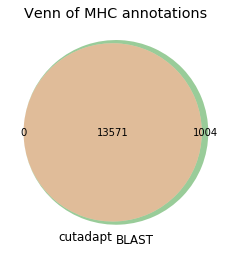

In [44]:
# Assumes that inputs are sets
a, b = set(barcode_df[(barcode_df.match_mhc > 1) & (barcode_df.a_primer_mhc == 'PRIMER_MHC')].gem.to_list()), set(blast_df[~blast_df.template_id.str.contains("A4000", na = False)].gem.to_list())

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

from matplotlib_venn import venn2

title = "Venn of MHC annotations"
# Make the diagram
venn2(subsets = (a_b, b_a, ab), set_labels = ('cutadapt', 'BLAST'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".joined.pdf", bbox_inches='tight')
plt.show()

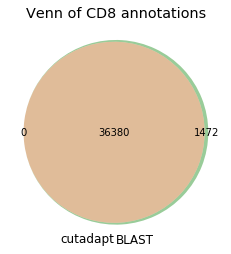

In [45]:
# Assumes that inputs are sets
a, b = set(barcode_df[(barcode_df.match_cd8 > 1) & (barcode_df.a_primer_cd8 == 'PRIMER_CD8')].gem.to_list()), set(blast_df[blast_df.template_id.str.contains("A4000", na = False)].gem.to_list())

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

from matplotlib_venn import venn2

title = "Venn of CD8 annotations"
# Make the diagram
venn2(subsets = (a_b, b_a, ab), set_labels = ('cutadapt', 'BLAST'))
plt.title(title)
#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".joined.pdf", bbox_inches='tight')
plt.show()

## Specificity matrix scatter plot

In [31]:
credible_df = clonotype_barcode_specificity_df[(clonotype_barcode_specificity_df.credible_alignment_mhc == True)].copy()
credible_df['clonotype'].fillna('None', inplace=True)
credible_df.sort_values(by=['clonotype'], inplace=True)

### GEM to clonotype

In [32]:
gem_to_clonotype = dict()

for gem in credible_df.gem.unique():
    clonotypes = credible_df[credible_df.gem == gem].clonotype.values
    
    assert len(np.unique(clonotypes)) == 1, print(clonotypes, gem)
    #assert 'clonotype' in clonotypes[0], print(clonotypes)
    
    gem_to_clonotype[gem] = clonotypes[0]
    
for gem in specificity_matrix.index.to_list():
    if not gem in gem_to_clonotype:
        gem_to_clonotype[gem] = 'None'

### Clonotype to color

In [33]:
all_clonotypes = credible_df.clonotype.unique()
col_clonotypes = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2'] * len(all_clonotypes)

clonotype_to_color = dict()
for i, clonotype in enumerate(all_clonotypes):
    clonotype_to_color[clonotype] = col_clonotypes[i]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


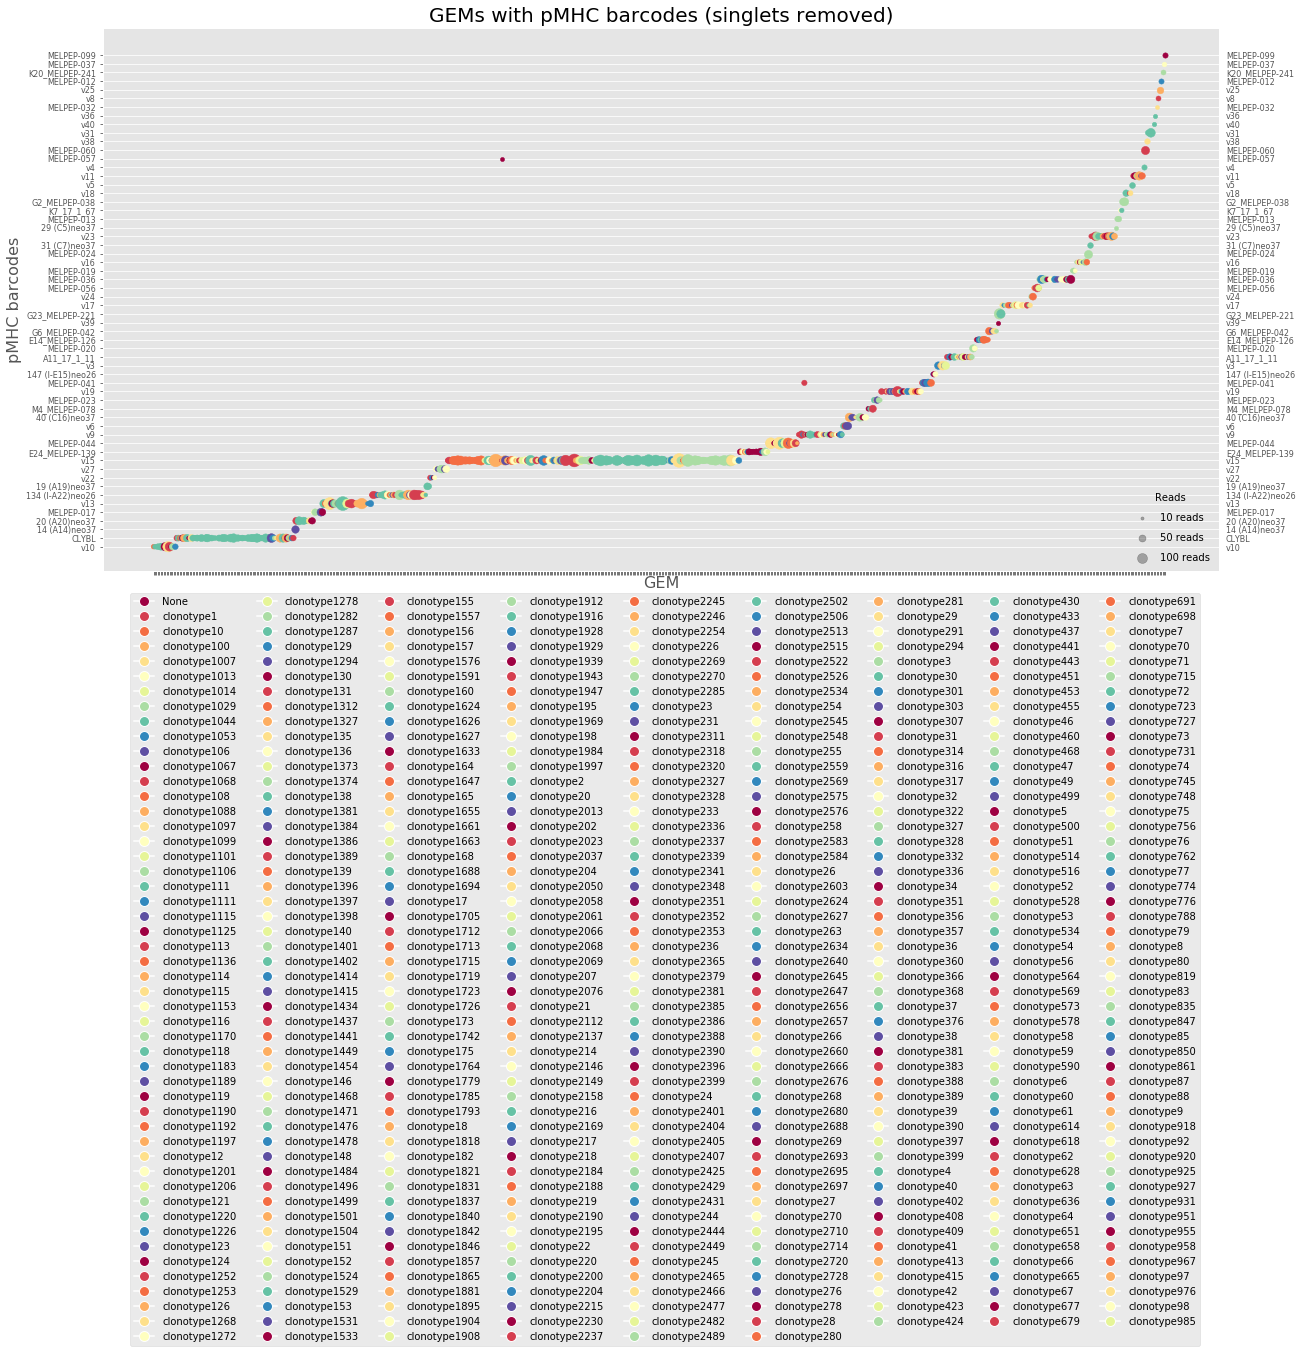

In [34]:
import matplotlib as mpl
mpl.rcParams['axes.grid.axis'] = 'y'

read_threshold = 10

all_clonotypes = credible_df.clonotype.unique()
num_clonotypes = len(all_clonotypes)

fig, ax = plt.subplots(figsize=(20, 10))

for mhc_barcode in credible_df.epitope.unique(): #specificity_df.columns:
    if mhc_barcode == '0':
        continue
    
    gems = credible_df[(credible_df.epitope == mhc_barcode) & (credible_df.read_counts_mhc >= read_threshold)].gem.values
    mhcs = [mhc_barcode] * len(gems)
    reads = credible_df[(credible_df.epitope == mhc_barcode) & (credible_df.read_counts_mhc >= read_threshold)].read_counts_mhc.values
    
    clonotypes = np.array([gem_to_clonotype[gem] for gem in gems])
    
    none_indexes = np.where(clonotypes == 'None')

    gems = np.delete(gems, none_indexes)
    mhcs = np.delete(mhcs, none_indexes)
    reads = np.delete(reads, none_indexes)
    clonotypes = np.delete(clonotypes, none_indexes)

    #colors = [Paired(float(list(all_clonotypes).index(i))/num_clonotypes) for i in clonotypes]
    colors = [clonotype_to_color[ct] for ct in clonotypes]
    #colors = ['#9e0142'] * len(gems)
    
    scatter = ax.scatter(gems, mhcs, s=reads, c=colors, edgecolors='face') #, alpha=0.3

plt.tick_params(labelbottom=False, labelright=True, labelsize=8) #8

## produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
#ax.add_artist(legend1)
#
## produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
##plt.legend([5, 10, 20], ["5", "10", "20"], loc="lower right", title="Sizes", prop="sizes")

from matplotlib.lines import Line2D

legend_elements = []
for clonotype_label in all_clonotypes:
    legend_elements += [Line2D([0], [0], marker='o', color='w', label=clonotype_label, markerfacecolor=clonotype_to_color[clonotype_label], markersize=10)]

legend1 = ax.legend(handles=legend_elements, ncol=9, loc=2, bbox_to_anchor=(0.02, -0.03))
ax.add_artist(legend1)

for read_size in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.3, s=read_size, label=str(read_size) + ' reads')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Reads', loc='lower right')

plt.xlabel("GEM", fontsize=16)
plt.ylabel("pMHC barcodes", fontsize=16)
plt.title("GEMs with pMHC barcodes (singlets removed)", fontsize=20)
plt.savefig(FIG_DIR + "cred_GEMs_with_pMHC_barcodes_no_singlets.pdf", bbox_inches='tight')
plt.show()